 Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pynance as pn
import talib
import os

Load the Stock Data

In [17]:
stock_files = {
    "AAPL": "../data/stock_data/AAPL_historical_data.csv",
    "AMZN": "../data/stock_data/AMZN_historical_data.csv",
    "GOOG": "../data/stock_data/GOOG_historical_data.csv",
    "META": "../data/stock_data/META_historical_data.csv",
    "MSFT": "../data/stock_data/MSFT_historical_data.csv",
    "NVDA": "../data/stock_data/NVDA_historical_data.csv",
    "TSLA": "../data/stock_data/TSLA_historical_data.csv"
}

dfs = {}
for symbol, path in stock_files.items():
    try:
        if not os.path.exists(path):
            print(f"File not found: {path}")
            continue
        df = pd.read_csv(path, parse_dates=["Date"])       
        if "Date" not in df.columns:
            print(f"'Date' column missing in {symbol} file: {path}")
            continue
        df.set_index("Date", inplace=True)
        dfs[symbol] = df
        print(f"Loaded {symbol} data with shape {df.shape}")

    except Exception as e:
        print(f"Error loading {symbol} from {path}: {e}")

for symbol, df in dfs.items():
    print(f"{symbol} -> Columns: {df.columns.tolist()}")   


Loaded AAPL data with shape (10998, 8)
Loaded AMZN data with shape (6846, 8)
Loaded GOOG data with shape (5020, 8)
Loaded META data with shape (2926, 8)
Loaded MSFT data with shape (9672, 8)
Loaded NVDA data with shape (6421, 8)
Loaded TSLA data with shape (3545, 8)
AAPL -> Columns: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']
AMZN -> Columns: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']
GOOG -> Columns: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']
META -> Columns: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']
MSFT -> Columns: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']
NVDA -> Columns: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']
TSLA -> Columns: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']


Applying Technical Indicators to stock DataFrame using TA-Lib

a, Calculate Simple Moving Average (SMA),Relative Strength Index (RSI) & Moving Average Convergence Divergence and its signal line:

In [33]:
def add_technical_indicators(df):
    df = df.copy() 

    # Ensure 'Close' exists and has enough data
    if "Close" not in df.columns or len(df) < 30:
        print("Not enough data or missing 'Close' column.")
        return df
    # Simple Moving Average (20-day)
    df["SMA_20"] = talib.SMA(df["Close"], timeperiod=20)

    # RSI (14-day)
    df["RSI"] = talib.RSI(df["Close"], timeperiod=14)

    # MACD and MACD Signal Line
    macd, macd_signal, _ = talib.MACD(df["Close"], fastperiod=12, slowperiod=26, signalperiod=9)
    df["MACD"] = macd
    df["MACD_signal"] = macd_signal

    return df

for symbol in dfs:
    print(f"📈 Adding indicators to {symbol}")
    dfs[symbol] = add_technical_indicators(dfs[symbol])
#check for AAPL
dfs["AAPL"].tail(10)[["Close", "SMA_20", "RSI", "MACD", "MACD_signal"]]

📈 Adding indicators to AAPL
📈 Adding indicators to AMZN
📈 Adding indicators to GOOG
📈 Adding indicators to META
📈 Adding indicators to MSFT
📈 Adding indicators to NVDA
📈 Adding indicators to TSLA


,Close,SMA_20,RSI,MACD,MACD_signal
Date,,,,,
2024-07-17,228.880005,220.862000,63.587172,8.463671,8.310411
2024-07-18,224.179993,221.356500,56.919750,7.612783,8.170885
2024-07-19,224.309998,222.088000,57.053890,6.869748,7.910658
2024-07-22,223.960007,222.911501,56.543451,6.181391,7.564804
2024-07-23,225.009995,223.755000,57.764268,5.655396,7.182923
2024-07-24,218.539993,224.228500,48.687742,4.662717,6.678882
2024-07-25,217.490005,224.440500,47.386437,3.748082,6.092722
2024-07-26,217.960007,224.633500,48.055700,3.026267,5.479431
2024-07-29,218.240005,225.014500,48.476184,2.448591,4.873263


Add Financial Metrics Using PyNance Logic

In [35]:
def add_financial_metrics(df):
    df = df.copy()

    df['daily_return'] = df['Close'].pct_change()

    # Cumulative returns
    df['cumulative_return'] = (1 + df['daily_return']).cumprod()

    # Rolling volatility (30-day std of returns)
    df['rolling_volatility'] = df['daily_return'].rolling(window=30).std()

    # 30-day rolling mean (like SMA)
    df['rolling_mean'] = df['Close'].rolling(window=30).mean()

    return df
for symbol in dfs:
    print(f"📊 Adding financial metrics to {symbol}")
    dfs[symbol] = add_financial_metrics(dfs[symbol])

📊 Adding financial metrics to AAPL
📊 Adding financial metrics to AMZN
📊 Adding financial metrics to GOOG
📊 Adding financial metrics to META
📊 Adding financial metrics to MSFT
📊 Adding financial metrics to NVDA
📊 Adding financial metrics to TSLA


Visualizing the data and technical indicators

Visualizing indicators for AAPL


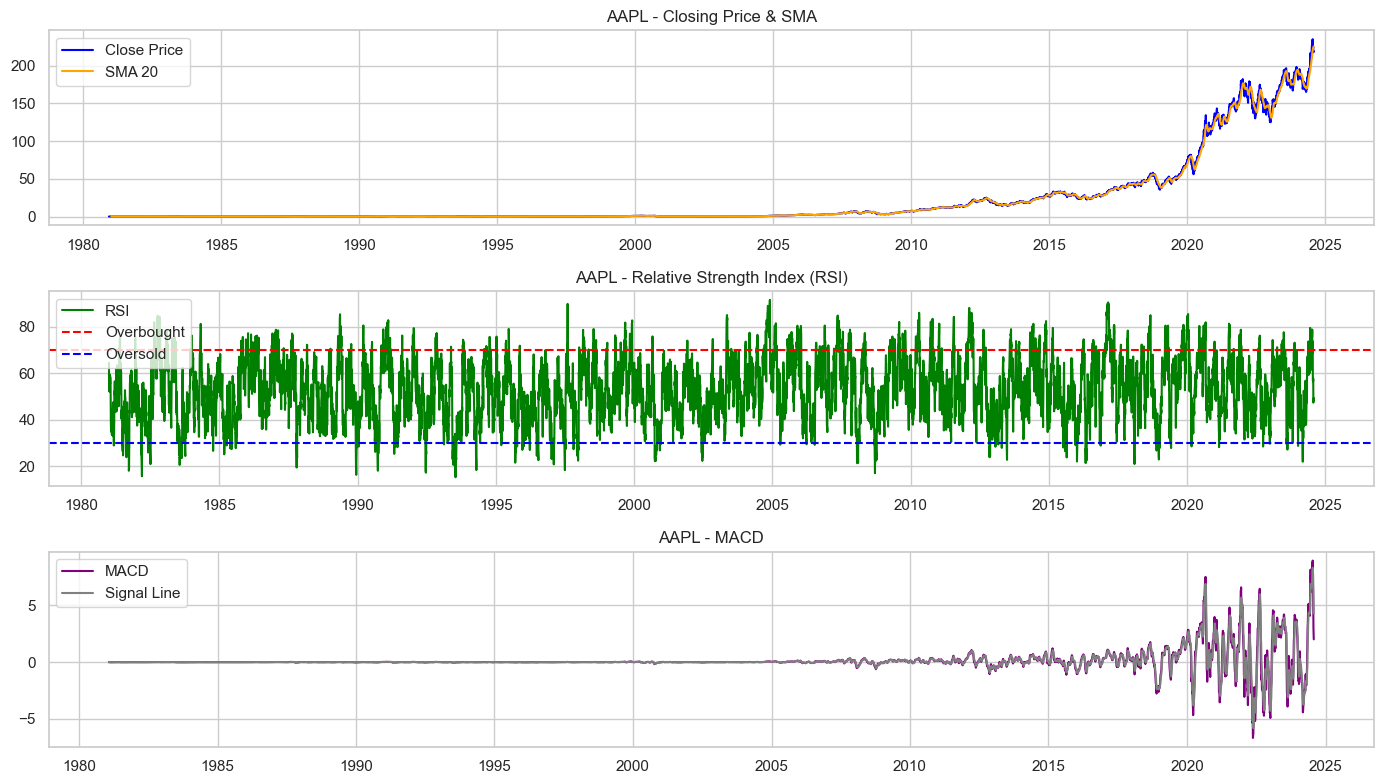

Visualizing indicators for AMZN


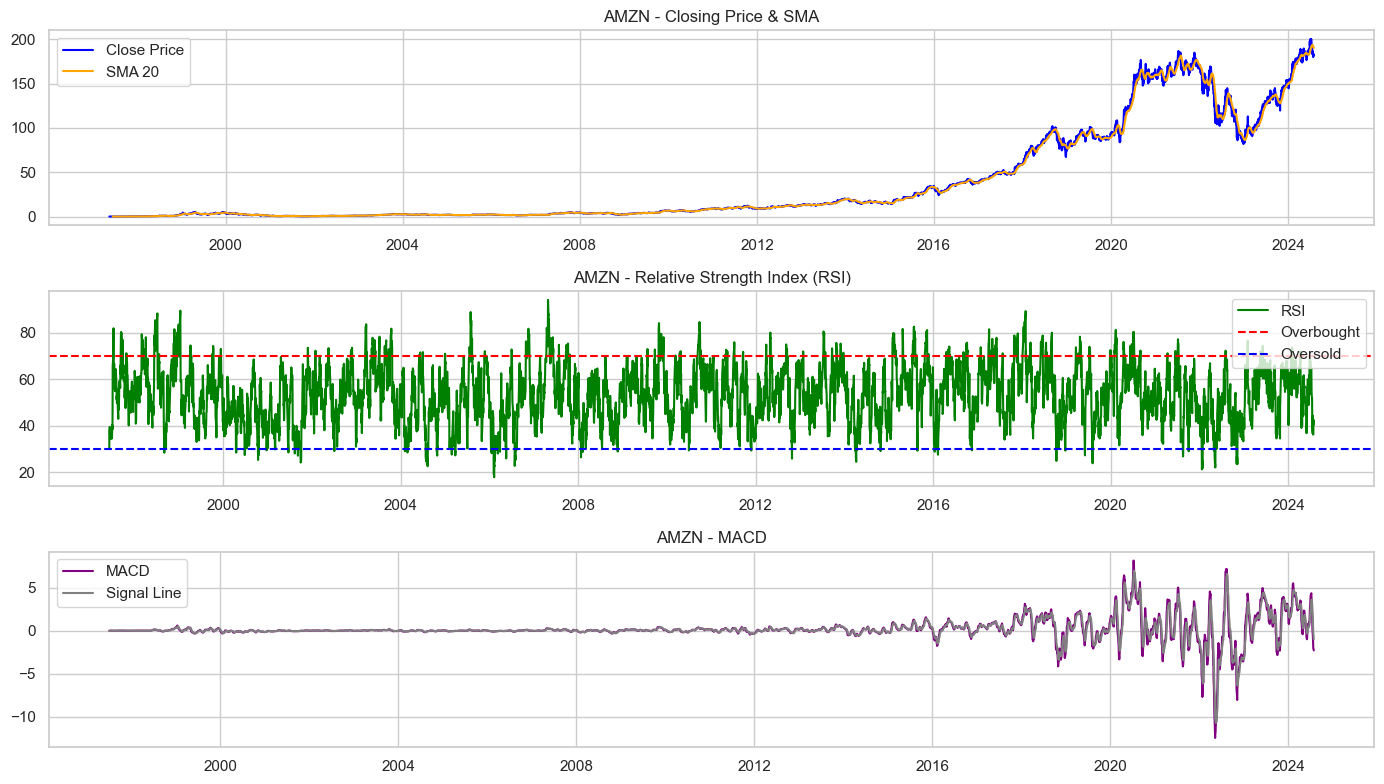

Visualizing indicators for GOOG


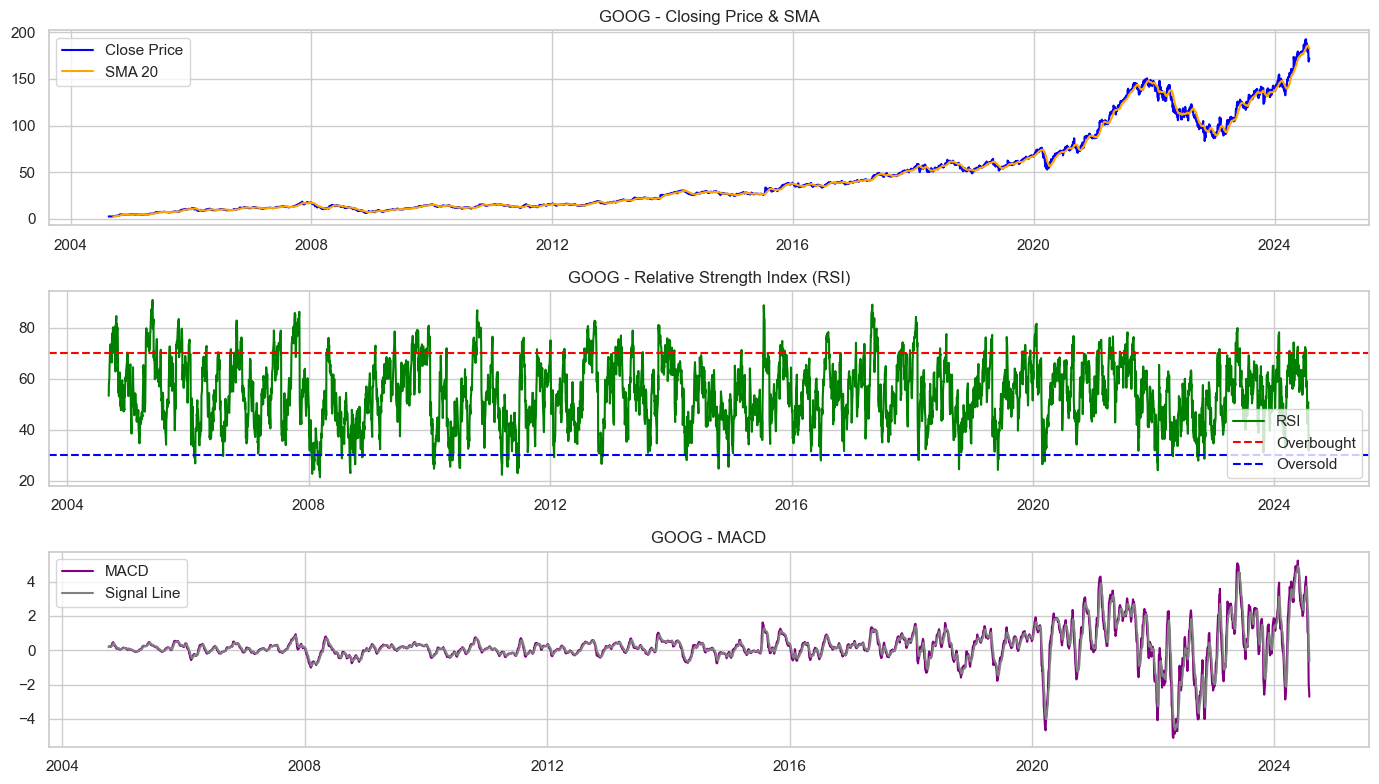

Visualizing indicators for META


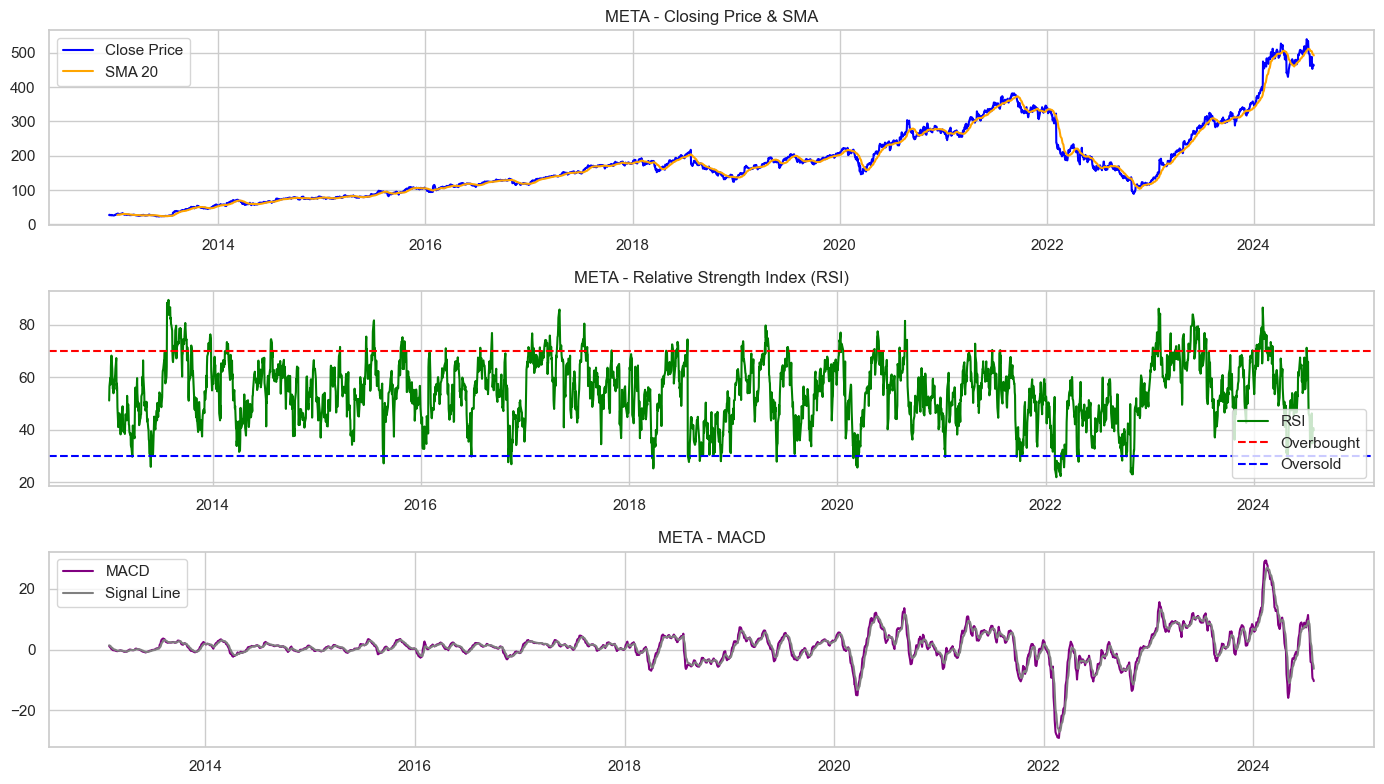

Visualizing indicators for MSFT


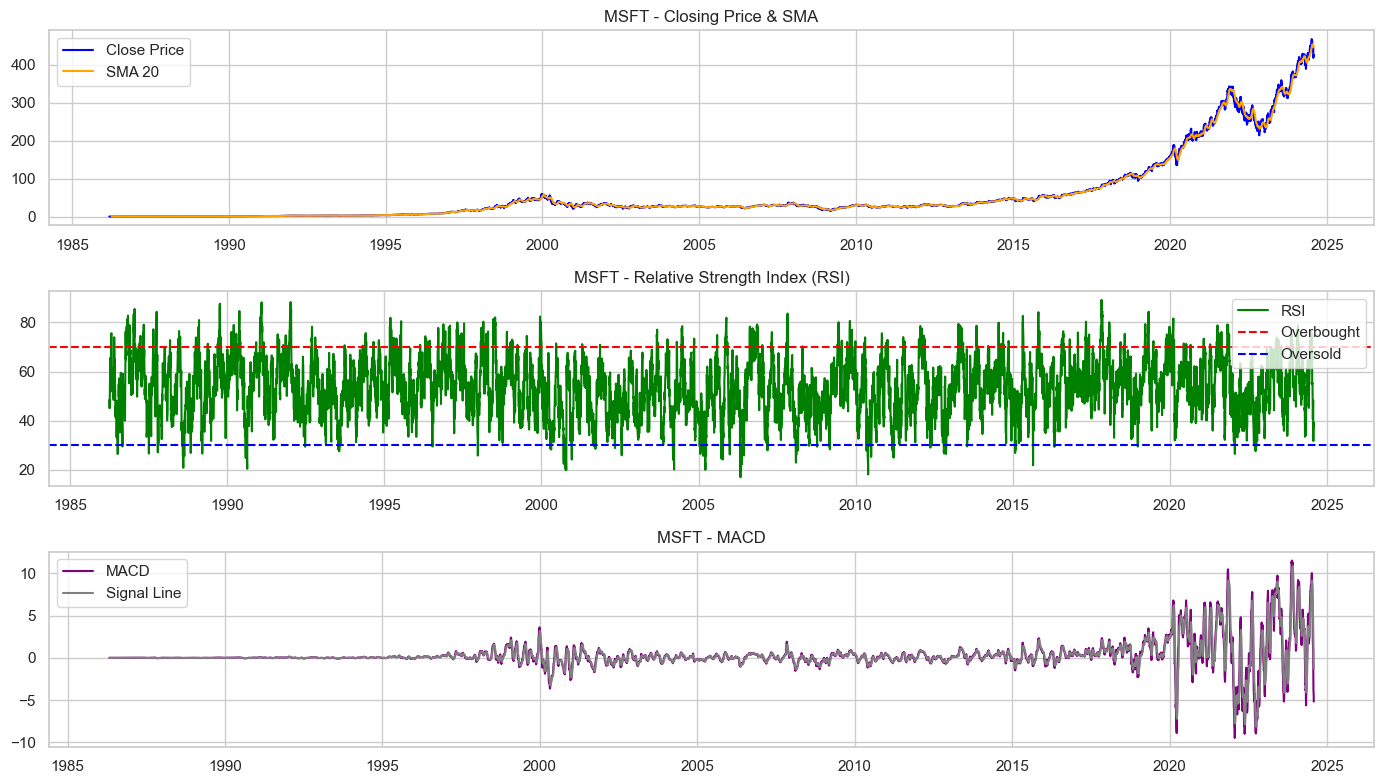

Visualizing indicators for NVDA


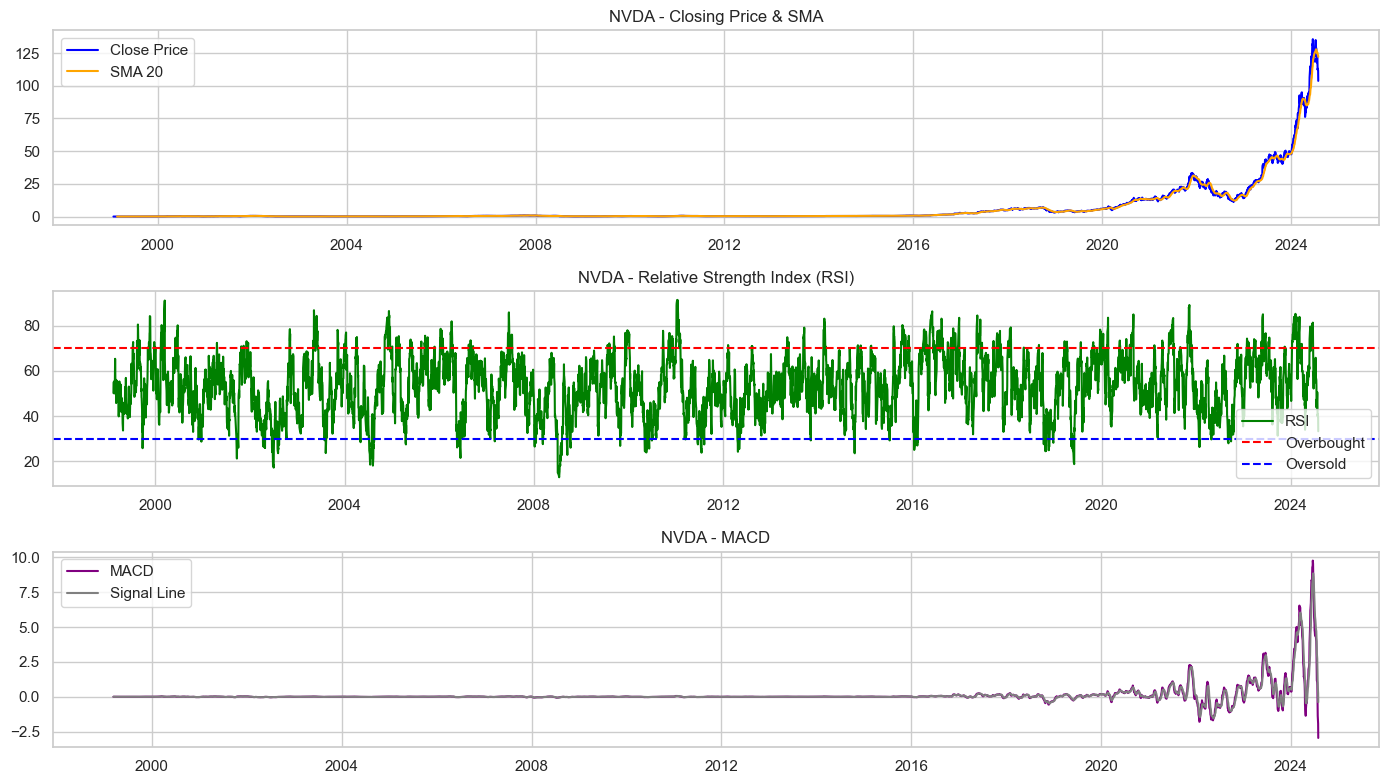

Visualizing indicators for TSLA


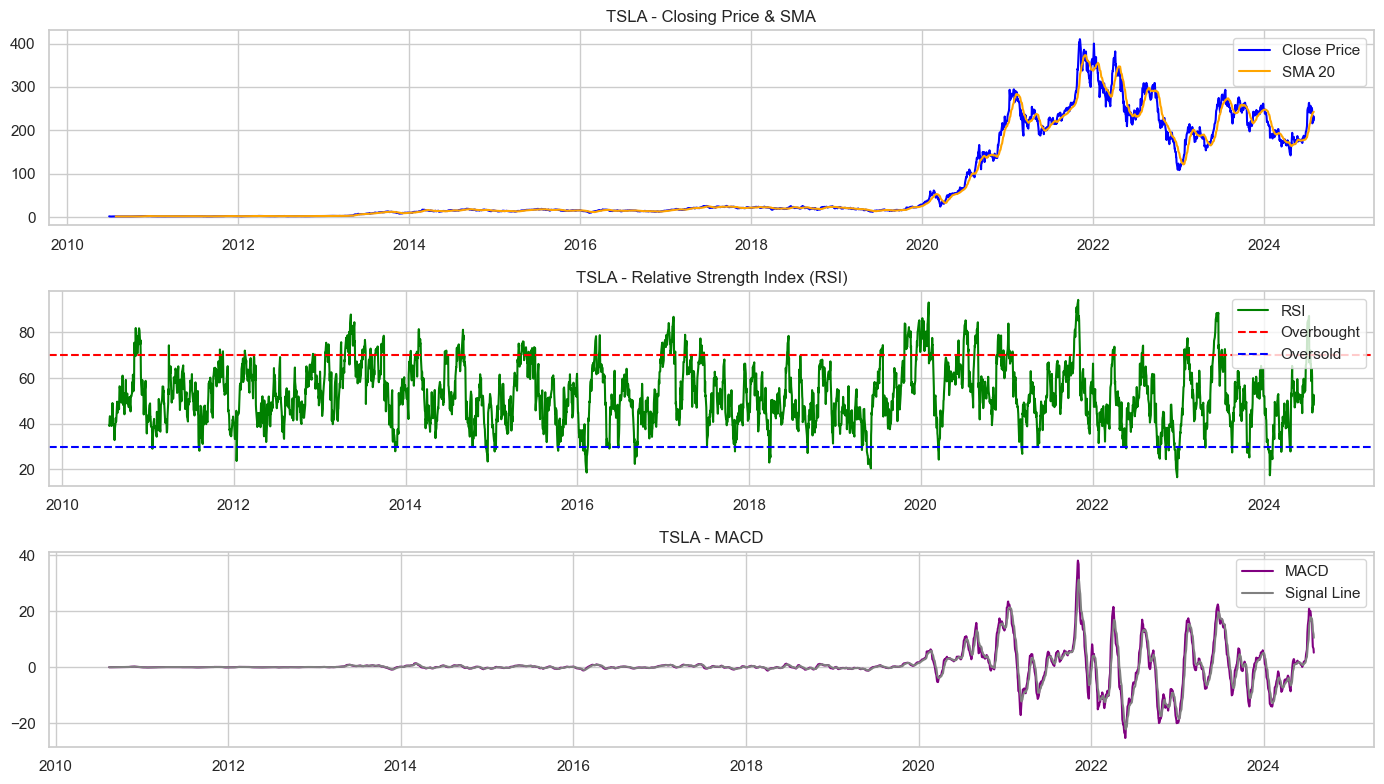

In [38]:
sns.set(style='whitegrid') 
def plot_technical_indicators(df, symbol):
    plt.figure(figsize=(14, 8))

    # Subplot 1: Closing Price and SMA
    plt.subplot(3, 1, 1)
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.plot(df.index, df['SMA_20'], label='SMA 20', color='orange')
    plt.title(f'{symbol} - Closing Price & SMA')
    plt.legend()

    # Subplot 2: RSI
    plt.subplot(3, 1, 2)
    plt.plot(df.index, df['RSI'], label='RSI', color='green')
    plt.axhline(70, color='red', linestyle='--', label='Overbought')
    plt.axhline(30, color='blue', linestyle='--', label='Oversold')
    plt.title(f'{symbol} - Relative Strength Index (RSI)')
    plt.legend()

    # Subplot 3: MACD
    plt.subplot(3, 1, 3)
    plt.plot(df.index, df['MACD'], label='MACD', color='purple')
    plt.plot(df.index, df['MACD_signal'], label='Signal Line', color='grey')
    plt.title(f'{symbol} - MACD')
    plt.legend()

    plt.tight_layout()
    plt.show()
for symbol, df in dfs.items():
    print(f"Visualizing indicators for {symbol}")
    plot_technical_indicators(df, symbol)